In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
data=pd.read_csv('/content/diamonds.csv')

In [ ]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


#checking missing values

In [ ]:
data.isnull()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


##data discribing


In [ ]:
data.describe()
#what does it mean?

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<Axes: >

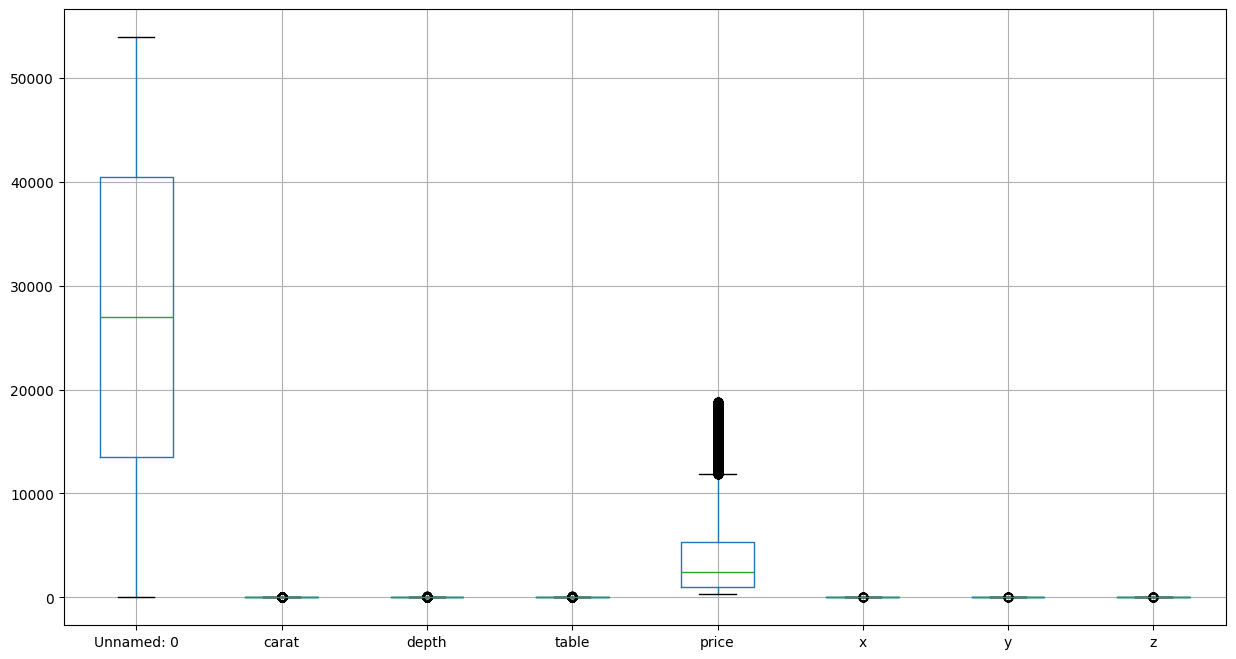

In [ ]:
plt.figure(figsize=(15,8))
data.boxplot()


<Axes: xlabel='price'>

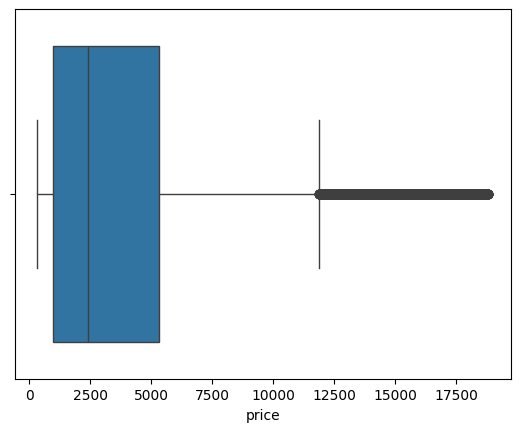

In [ ]:
sns.boxplot(x="price",data=data)

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
5               6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  

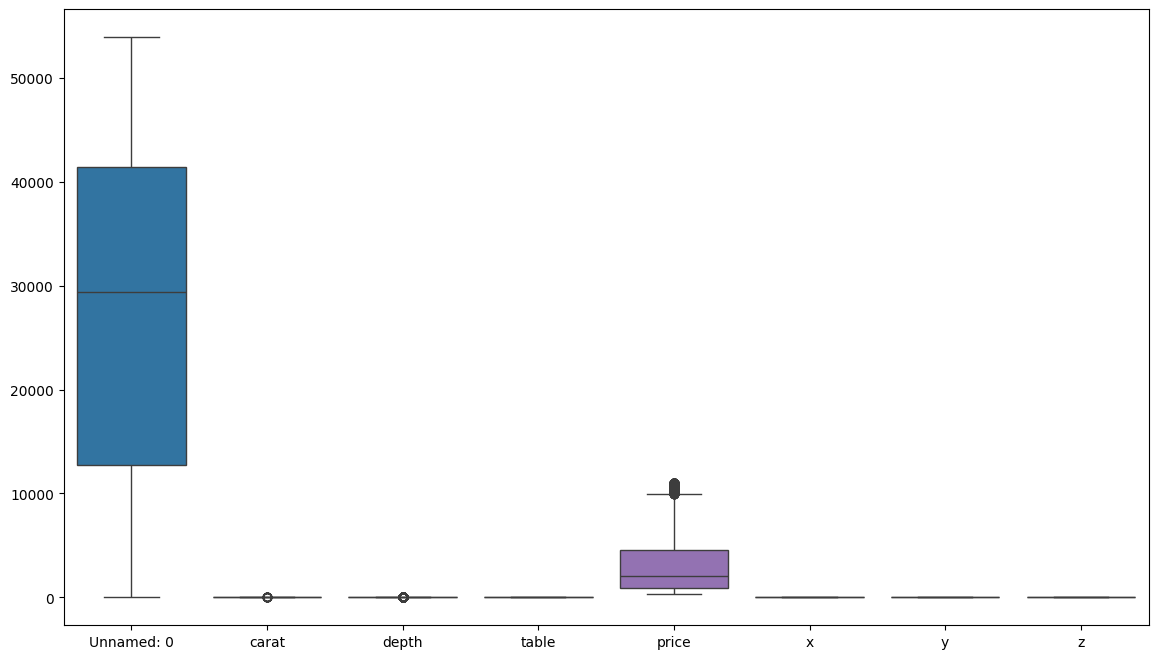

In [ ]:
import pandas as pd


# Identify numerical columns to remove outliers from
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Function to remove outliers based on IQR
def remove_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        # Filtering the dataset to exclude outliers
        data = data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]
    return data

# Removing outliers from the specified numerical columns
df_clean = remove_outliers(data, numerical_columns)

# Display the cleaned data
print(df_clean)


plt.figure(figsize=(14, 8))
sns.boxplot(data=df_clean)
plt.show()


       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
5               6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
6               7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53934       53935   0.72    Premium     D     SI1   62.7   59.0   2757  5.69   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  

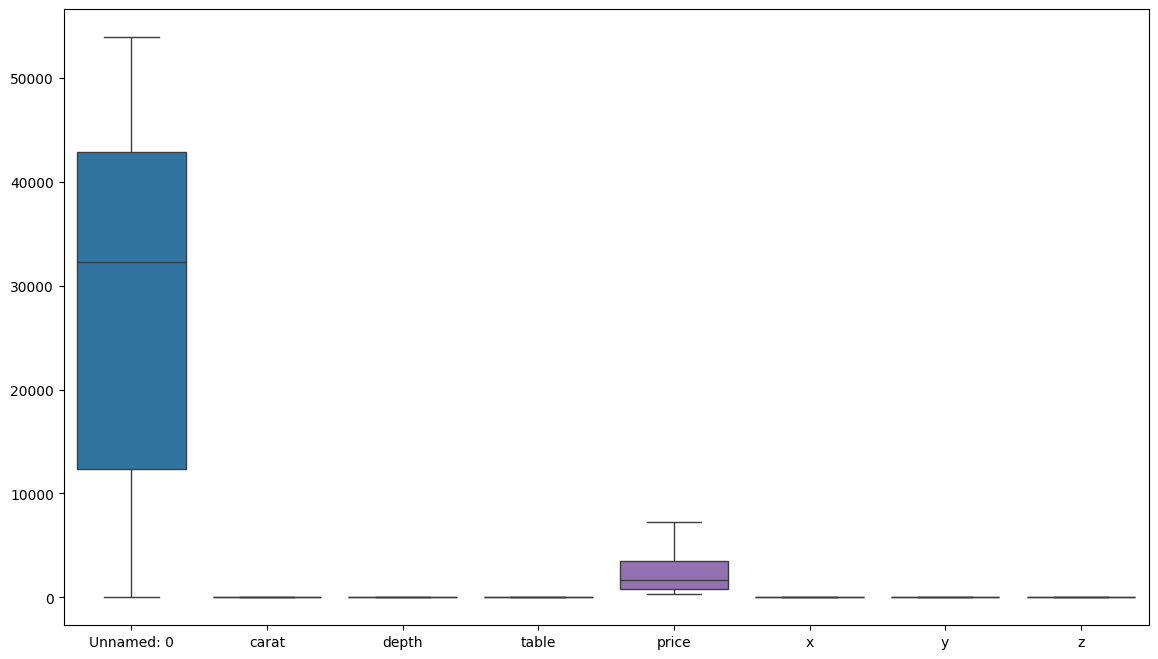

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Identify numerical columns to remove outliers from
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Function to remove outliers based on a stricter IQR
def remove_outliers(data, columns, factor=1.0):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        # Filtering the dataset to exclude more extreme outliers
        data = data[(data[col] >= Q1 - factor * IQR) & (data[col] <= Q3 + factor * IQR)]
    return data


df_clean_strict = remove_outliers(data, numerical_columns, factor=0.75)

# Display the cleaned data
print(df_clean_strict)

# Optionally, plot the data again to see the effect of outlier removal
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_clean_strict)
plt.show()


data preprocessing

In [ ]:
df_clean_strict

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...,...
53934,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
x=df_clean_strict.drop(columns=['price'],axis=1)
y=df_clean_strict['price']


In [ ]:
x.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
11,12,0.23,Ideal,J,VS1,62.8,56.0,3.93,3.90,2.46
15,16,0.32,Premium,E,I1,60.9,58.0,4.38,4.42,2.68
19,20,0.30,Very Good,J,SI1,62.7,59.0,4.21,4.27,2.66
20,21,0.30,Good,I,SI2,63.3,56.0,4.26,4.30,2.71


In [ ]:
# color === d=0 , e=1 ,f=2 , g=3 , h=4 , i=5 j=6
#cut === ideal=2  , premium=3  , good=1  , very good= 4, fair=0
# clarity== 1,4,,8
#si2=3
#vs2=5
#vs1= 4
#si1=2

#i1=1
#if= 8
#vvs1=6
#vvs2=7

In [ ]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['cut']=le.fit_transform(x['cut'])
x['color']=le.fit_transform(x['color'])
x['clarity']=le.fit_transform(x['clarity'])

In [ ]:
x

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
3,4,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
5,6,0.24,4,6,7,62.8,57.0,3.94,3.96,2.48
6,7,0.24,4,5,6,62.3,57.0,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...
53934,53935,0.72,3,0,2,62.7,59.0,5.69,5.73,3.58
53935,53936,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,53937,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53938,53939,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


data splitting

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#why random state =42

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
3,4,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
5,6,0.24,4,6,7,62.8,57.0,3.94,3.96,2.48
6,7,0.24,4,5,6,62.3,57.0,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...
53934,53935,0.72,3,0,2,62.7,59.0,5.69,5.73,3.58
53935,53936,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,53937,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53938,53939,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


#Model building

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(128,activation='relu',input_shape=(x_train.shape[1],)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1)
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,729 (38.00 KB)

 Trainable params: 9,729 (38.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=['mae']) #ADAM?

Model training

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
674/674 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5858715.5000 - mae: 1785.2798 - val_loss: 424312.8438 - val_mae: 483.1553
Epoch 2/100
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 337621.9062 - mae: 410.9002 - val_loss: 236878.6875 - val_mae: 328.2766
Epoch 3/100
674/674 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 230971.0625 - mae: 321.0342 - val_loss: 224137.3281 - val_mae: 314.7476
Epoch 4/100
674/674 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 217469.9844 - mae: 310.8195 - val_loss: 222172.2188 - val_mae: 313.6493
Epoch 5/100
674/674 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 212868.1562 - mae: 306.8800 - val_loss: 213599.5781 - val_mae: 304.5002
Epoch 6/100
674/674 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 212043.2500 - mae: 303.2174 - val_loss: 210210.0625 - val_mae: 300.7188
Epoch 7/100
674/674 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 211544.1719 - mae: 300.8806 - val_loss: 206931.1719 - val_mae: 296.8140
Epoch 8/100
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 207404

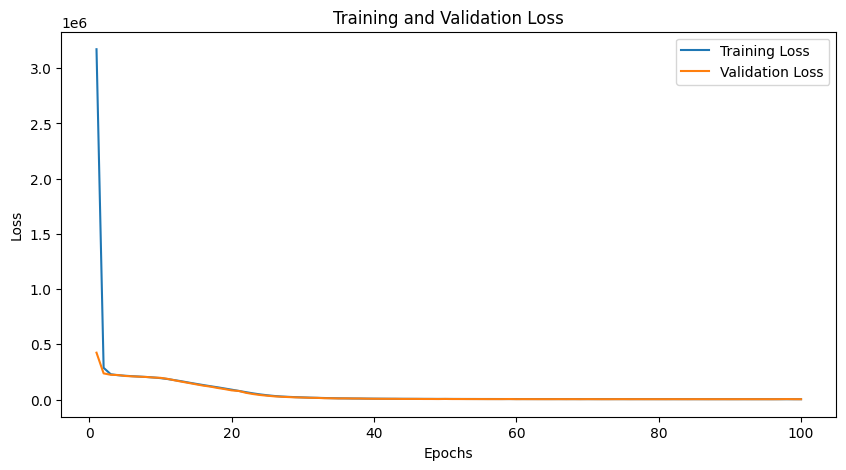

In [ ]:
# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
loss,mean_squared_error=model.evaluate(x_test,y_test)
print(f'loss:{loss}')
print(f'mean absoute error on test data:{mean_squared_error}')

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3727.0293 - mae: 34.3363
loss:3239.314697265625
mean absoute error on test data:33.400447845458984


In [ ]:
prediction=model.predict(x_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,prediction)
r2=r2_score(y_test,prediction)
print(f'mean squared error:{mse}')
print(f'r2 score:{r2}')

mean squared error:3239.3139153231377
r2 score:0.999042809009552


In [ ]:
import numpy as np

# Assuming your original data has 10 features, make sure 'new_data' also has 10
new_data = np.array([[0.23, 3, 2, 4, 61.5, 55, 3.95, 3.98, 2.43,0]])  # Added a dummy feature to make it 10

new_data = new_data.reshape(1, -1)  # Reshape to (1, 10)

predicted_price = model.predict(new_data)

print("Predicted Diamond Price:", predicted_price[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Diamond Price: 54209.625


In [ ]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow import keras

# Define a function for the model with hyperparameters
def build_model(hp):
    model = keras.Sequential()

    # Tune the number of neurons in the first dense layer
    model.add(keras.layers.Dense(
        units=hp.Int('units_layer1', min_value=64, max_value=256, step=32),
        activation='relu',
        input_shape=(x_train.shape[1],)))

    # Tune the number of neurons in the second dense layer
    model.add(keras.layers.Dense(
        units=hp.Int('units_layer2', min_value=32, max_value=128, step=16),
        activation='relu'))

    # Output layer (fixed for regression)
    model.add(keras.layers.Dense(1))

    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error'])

    return model

# Initialize the tuner with a max of 2 trials
tuner = kt.RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=2,  # Limit to 2 hyperparameter configurations
    executions_per_trial=1,  # Number of models to train per configuration
    directory='my_dir',
    project_name='hyperparameter_tuning')

# Search for the best hyperparameters
tuner.search(x_train, y_train, epochs=10, validation_split=0.2)

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the first layer is {best_hps.get('units_layer1')}
and in the second layer is {best_hps.get('units_layer2')}.
The optimal learning rate is {best_hps.get('learning_rate')}.
""")

# Train the best model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(x_train, y_train, epochs=20, validation_split=0.2)

# Evaluate the model
best_model.evaluate(x_test, y_test)


Reloading Tuner from my_dir/hyperparameter_tuning/tuner0.json

The optimal number of units in the first layer is 96
and in the second layer is 80.
The optimal learning rate is 0.01.

Epoch 1/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2060363.5000 - mean_absolute_error: 819.1953 - val_loss: 196314.6562 - val_mean_absolute_error: 286.1269
Epoch 2/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 216666.4375 - mean_absolute_error: 295.3804 - val_loss: 215706.2344 - val_mean_absolute_error: 293.5775
Epoch 3/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 196705.5781 - mean_absolute_error: 275.9679 - val_loss: 165699.4688 - val_mean_absolute_error: 244.0900
Epoch 4/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 167428.9688 - mean_absolute_error: 244.5220 - val_loss: 121974.9453 - val_mean_absolute_error: 222.1329
Epoch 5/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 118792.7578 - mean_absolute_error: 213.8040 - val_loss: 72394.7031 - val_mean_absolute_error: 171.10

[6271.3359375, 57.59117126464844]

In [ ]:
import pickle
import joblib
joblib.dump(model,'model.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(le, 'label_encoder.joblib')

